# YOLO 학습을 위한 셋팅
*   이미지파일 + 각각의 txt 어노테이션 파일
*   YOLO 어노테이션 포맷: `<object-class> <x_center> <y_center> <width> <height>`
*   yaml 파일 필요

위에 파일을들 한곳에 압축해 한번에 형식에 맞게 풀면 정말정말 좋겠다...
(용량커서 튕김)
*   데이터셋
    - train: 14000장 중 현재는 약 만장
    - valid: 만장중에서 떼서 쓸 예정
    - test: 6000 고정
*   데이터 저장소 (yolov5 data 폴더 안에 기본 형태로 압축 풀어줘서 데이터 넣어주기)
```
dataset/
├── train/
│   ├── images/
│   │   ├── image1.jpg
│   │   ├── image2.jpg
│   │   └── ...
│   └── labels/
│       ├── image1.txt
│       ├── image2.txt
│       └── ...
└── valid/
    ├── images/
    │   ├── image1.jpg
    │   ├── image2.jpg
    │   └── ...
    └── labels/
        ├── image1.txt
        ├── image2.txt
        └── ...
```

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import numpy as np
from sklearn.model_selection import KFold

In [3]:
%cd /content
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -U -r requirements.txt

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 16077, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 16077 (delta 6), reused 8 (delta 1), pack-reused 16056
Receiving objects: 100% (16077/16077), 14.70 MiB | 3.42 MiB/s, done.
Resolving deltas: 100% (11034/11034), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 86.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 114.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.6/283.6 kB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2

In [ ]:
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2
import os
import numpy as np
from PIL import Image

# 압축 파일 yolov5로 복사

In [9]:
# 압축 해제할 위치 생성 및 이동
%mkdir /content/yolov5/ai_project
%mkdir /content/yolov5/ai_project/train
%mkdir /content/yolov5/ai_project/valid
%mkdir /content/yolov5/ai_project/test

%mkdir /content/yolov5/ai_project/train/images
%mkdir /content/yolov5/ai_project/train/labels

%mkdir /content/yolov5/ai_project/valid/images
%mkdir /content/yolov5/ai_project/valid/labels
%cd /content/yolov5/ai_project

/content/yolov5/ai_project


In [10]:
!unzip "/content/drive/MyDrive/ai_project/train/train_images/train640.zip" -d "/content/yolov5/ai_project/train/images"
!unzip "/content/drive/MyDrive/ai_project/train/train_labels/center_labels0to5_train.zip" -d "/content/yolov5/ai_project/train/labels"

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 extracting: /content/yolov5/ai_project/train/labels/CIT-SDB-3044_0008499.txt  
 extracting: /content/yolov5/ai_project/train/labels/CIT-SDB-3044_0007864.txt  
 extracting: /content/yolov5/ai_project/train/labels/CIT-SDB-3043_0005120.txt  
 extracting: /content/yolov5/ai_project/train/labels/CIT-SDB-3044_0002853.txt  
 extracting: /content/yolov5/ai_project/train/labels/CIT-SDB-3043_0000784.txt  
 extracting: /content/yolov5/ai_project/train/labels/CIT-SDB-3044_0002675.txt  
 extracting: /content/yolov5/ai_project/train/labels/CIT-SDB-3043_0006394.txt  
 extracting: /content/yolov5/ai_project/train/labels/CIT-SDB-3045_0001599.txt  
 extracting: /content/yolov5/ai_project/train/labels/CIT-SDB-3043_0002402.txt  
 extracting: /content/yolov5/ai_project/train/labels/CIT-SDB-3044_0008554.txt  
 extracting: /content/yolov5/ai_project/train/labels/CIT-SDB-3044_0004791.txt  
 extracting: /content/yolov5/ai_project/train/labels/CIT-SDB-3044_0007795.txt  
 ext

In [11]:
# 이코드는 640 돌릴때만 쓰는거임
import os
import shutil

# Define the source and intermediate directories
source_dir = '/content/yolov5/ai_project/train/images/content/train'
intermediate_dir = '/content/yolov5/ai_project/train/images/content'
destination_dir = '/content/yolov5/ai_project/train/images'

# Check if the source directory exists
if not os.path.exists(source_dir):
    print(f"Source directory {source_dir} does not exist.")
else:
    # Move each file from the source to the destination
    for filename in os.listdir(source_dir):
        source_file = os.path.join(source_dir, filename)
        destination_file = os.path.join(destination_dir, filename)

        # Move the file
        shutil.move(source_file, destination_file)

    # Delete the source directory after moving the files
    shutil.rmtree(source_dir)

    # Check if intermediate directory is empty and delete it
    if not os.listdir(intermediate_dir):
        shutil.rmtree(intermediate_dir)
        print(f"The intermediate directory {intermediate_dir} was empty and has been deleted.")

    print(f"All files have been moved from {source_dir} to {destination_dir}, and the source directory has been deleted.")

The intermediate directory /content/yolov5/ai_project/train/images/content was empty and has been deleted.
All files have been moved from /content/yolov5/ai_project/train/images/content/train to /content/yolov5/ai_project/train/images, and the source directory has been deleted.


In [ ]:
# # 압축 해제
# '''
# !unzip "/content/drive/MyDrive/ai_project/train/train_images/CIT-SDB-3043.zip" -d "/content/yolov5/ai_project/train/images"
# !unzip "/content/drive/MyDrive/ai_project/train/train_images/CIT-SDB-3044.zip" -d "/content/yolov5/ai_project/train/images"
# !unzip "/content/drive/MyDrive/ai_project/train/train_images/CIT-SDB-3045.zip" -d "/content/yolov5/ai_project/train/images"
# !unzip "/content/drive/MyDrive/ai_project/train/train_labels/center_labels_train.zip" -d "/content/yolov5/ai_project/train/labels"
# '''

In [12]:
# test 압축 해제
!unzip "/content/drive/MyDrive/ai_project/test/test.zip" -d "/content/yolov5/ai_project/test" # img+json
!unzip "/content/drive/MyDrive/ai_project/test/center_labels0to5_test.zip" -d "/content/yolov5/ai_project/test/labels" # txt

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 extracting: /content/yolov5/ai_project/test/labels/CIT-SDB-3043_0001676.txt  
 extracting: /content/yolov5/ai_project/test/labels/CIT-SDB-3043_0008635.txt  
 extracting: /content/yolov5/ai_project/test/labels/CIT-SDB-3043_0006376.txt  
 extracting: /content/yolov5/ai_project/test/labels/CIT-SDB-3044_0008030.txt  
 extracting: /content/yolov5/ai_project/test/labels/CIT-SDB-3044_0001181.txt  
 extracting: /content/yolov5/ai_project/test/labels/CIT-SDB-3043_0001743.txt  
 extracting: /content/yolov5/ai_project/test/labels/CIT-SDB-3044_0002267.txt  
 extracting: /content/yolov5/ai_project/test/labels/CIT-SDB-3044_0002840.txt  
 extracting: /content/yolov5/ai_project/test/labels/CIT-SDB-3044_0007282.txt  
 extracting: /content/yolov5/ai_project/test/labels/CIT-SDB-3044_0002035.txt  
 extracting: /content/yolov5/ai_project/test/labels/CIT-SDB-3043_0003690.txt  
 extracting: /content/yolov5/ai_project/test/labels/CIT-SDB-3044_0004437.txt  
 extracting: /co

In [ ]:
# import os
# import shutil

# source_dir = '/content/yolov5/ai_project/test/images/images'  # 파일들이 있는 원본 폴더
# destination_dir = '/content/yolov5/ai_project/test/images'   # 파일들을 이동시킬 대상 폴더

# # 원본 폴더에서 대상 폴더로 모든 파일 이동
# for filename in os.listdir(source_dir):
#     source_file = os.path.join(source_dir, filename)
#     destination_file = os.path.join(destination_dir, filename)

#     # 파일 이동 (이미 동일한 이름의 파일이 있는 경우 덮어쓰기)
#     shutil.move(source_file, destination_file)

# # 원본 폴더 삭제
# os.rmdir(source_dir)


In [13]:
# yaml 파일 욜로5에 붙여넣기
import shutil

# 원본 yaml 파일 경로
original_yaml_path = '/content/drive/MyDrive/ai_project/data.yaml'

# 목적지 경로 (YOLOv5 폴더)
destination_yaml_path = '/content/yolov5/ai_project/data.yaml'

# 파일 복사
shutil.copy(original_yaml_path, destination_yaml_path)

'/content/yolov5/ai_project/data.yaml'

In [14]:
from glob import glob
test_img_list = glob('/content/yolov5/ai_project/test/images/*.jpg')
train_img_list = glob('/content/yolov5/ai_project/train/images/*.jpg')
valid_img_list = glob('/content/yolov5/ai_project/valid/images/*.jpg')

print(len(train_img_list), len(test_img_list), len(valid_img_list))

14000 6000 0


# yaml

In [15]:
# 이미지 파일 목록을 작성합니다.
image_files = [os.path.join(dp, f) for dp, dn, filenames in os.walk("/content/yolov5/ai_project/train/images") for f in filenames if f.endswith('.jpg')]

# KFold 인스턴스 생성
kfold = KFold(n_splits=3, shuffle=True, random_state=42)

# Fold 별로 학습 및 검증을 위한 데이터셋 파일을 생성합니다.
for fold, (train_idx, val_idx) in enumerate(kfold.split(image_files)):
    # 학습 및 검증 데이터셋 파일 경로를 저장합니다.
    train_files = [image_files[i] for i in train_idx]
    val_files = [image_files[i] for i in val_idx]


    # train.txt와 val.txt 파일을 작성합니다.
    with open(f'data_fold_{fold}_train.txt', 'w') as f:
        f.writelines("%s\n" % path for path in train_files)

    with open(f'data_fold_{fold}_val.txt', 'w') as f:
        f.writelines("%s\n" % path for path in val_files)


In [16]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f. write(cell.format(**globals()))

In [17]:
%cat /content/yolov5/ai_project/data.yaml

train: /path/to/train/images/
val: /path/to/val/images/
nc: 6
names: ['Person', 'Bicycle', 'Motorcycle', 'Truck', 'Car', 'Bus']




In [18]:
%%writefile /content/yolov5/ai_project/data.yaml

train: /content/yolov5/ai_project/data_fold_0_train.txt
val: /content/yolov5/ai_project/data_fold_0_val.txt


nc: 6
names: ['Person', 'Bicycle', 'Motorcycle', 'Truck', 'Car', 'Bus']


Overwriting /content/yolov5/ai_project/data.yaml


In [19]:
%cat /content/yolov5/ai_project/data.yaml


train: /content/yolov5/ai_project/data_fold_0_train.txt
val: /content/yolov5/ai_project/data_fold_0_val.txt


nc: 6
names: ['Person', 'Bicycle', 'Motorcycle', 'Truck', 'Car', 'Bus']


In [20]:
import yaml
# 클래스 수 수정 후 yaml로 저장
with open ("/content/yolov5/ai_project/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

# 모델 구성

In [21]:
%cat /content/yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, AGPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]

In [22]:
%%writefile /content/yolov5/models/custom_yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, AGPL-3.0 license

# Parameters
nc: 6  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

Writing /content/yolov5/models/custom_yolov5s.yaml


In [23]:
%cat /content/yolov5/models/custom_yolov5s.yaml


# YOLOv5 🚀 by Ultralytics, AGPL-3.0 license

# Parameters
nc: 6  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]

# model 학습

## Train 1

In [35]:
%time
%cd /content/yolov5
!python train.py --img 640 --batch 32 --epoch 1 --data ./ai_project/data.yaml --cfg ./models/custom_yolov5s.yaml  --name ai_results --cache --weights '/content/drive/MyDrive/ai_project/yolov5s.pt'

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs
/content/yolov5
2023-11-23 16:43:41.907025: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-23 16:43:41.907081: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-23 16:43:41.907118: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=/content/drive/MyDrive/ai_project/yolov5s.pt, cfg=./models/custom_yolov5s.yaml, data=./ai_project/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=1, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False

### best.pt 출력

In [ ]:
!ls runs/train/ai_results

confusion_matrix.png				     PR_curve.png	    val_batch0_pred.jpg
events.out.tfevents.1700503607.d92e0c7028f6.16431.0  R_curve.png	    val_batch1_labels.jpg
F1_curve.png					     results.csv	    val_batch1_pred.jpg
hyp.yaml					     results.png	    val_batch2_labels.jpg
labels_correlogram.jpg				     train_batch0.jpg	    val_batch2_pred.jpg
labels.jpg					     train_batch1.jpg	    weights
opt.yaml					     train_batch2.jpg
P_curve.png					     val_batch0_labels.jpg


In [ ]:
%cp  /content/yolov5/runs/train/ai_results/weights/best.pt /content/drive/MyDrive

### 이미지 결과확인

In [ ]:
from IPython.display import Image
from IPython import display

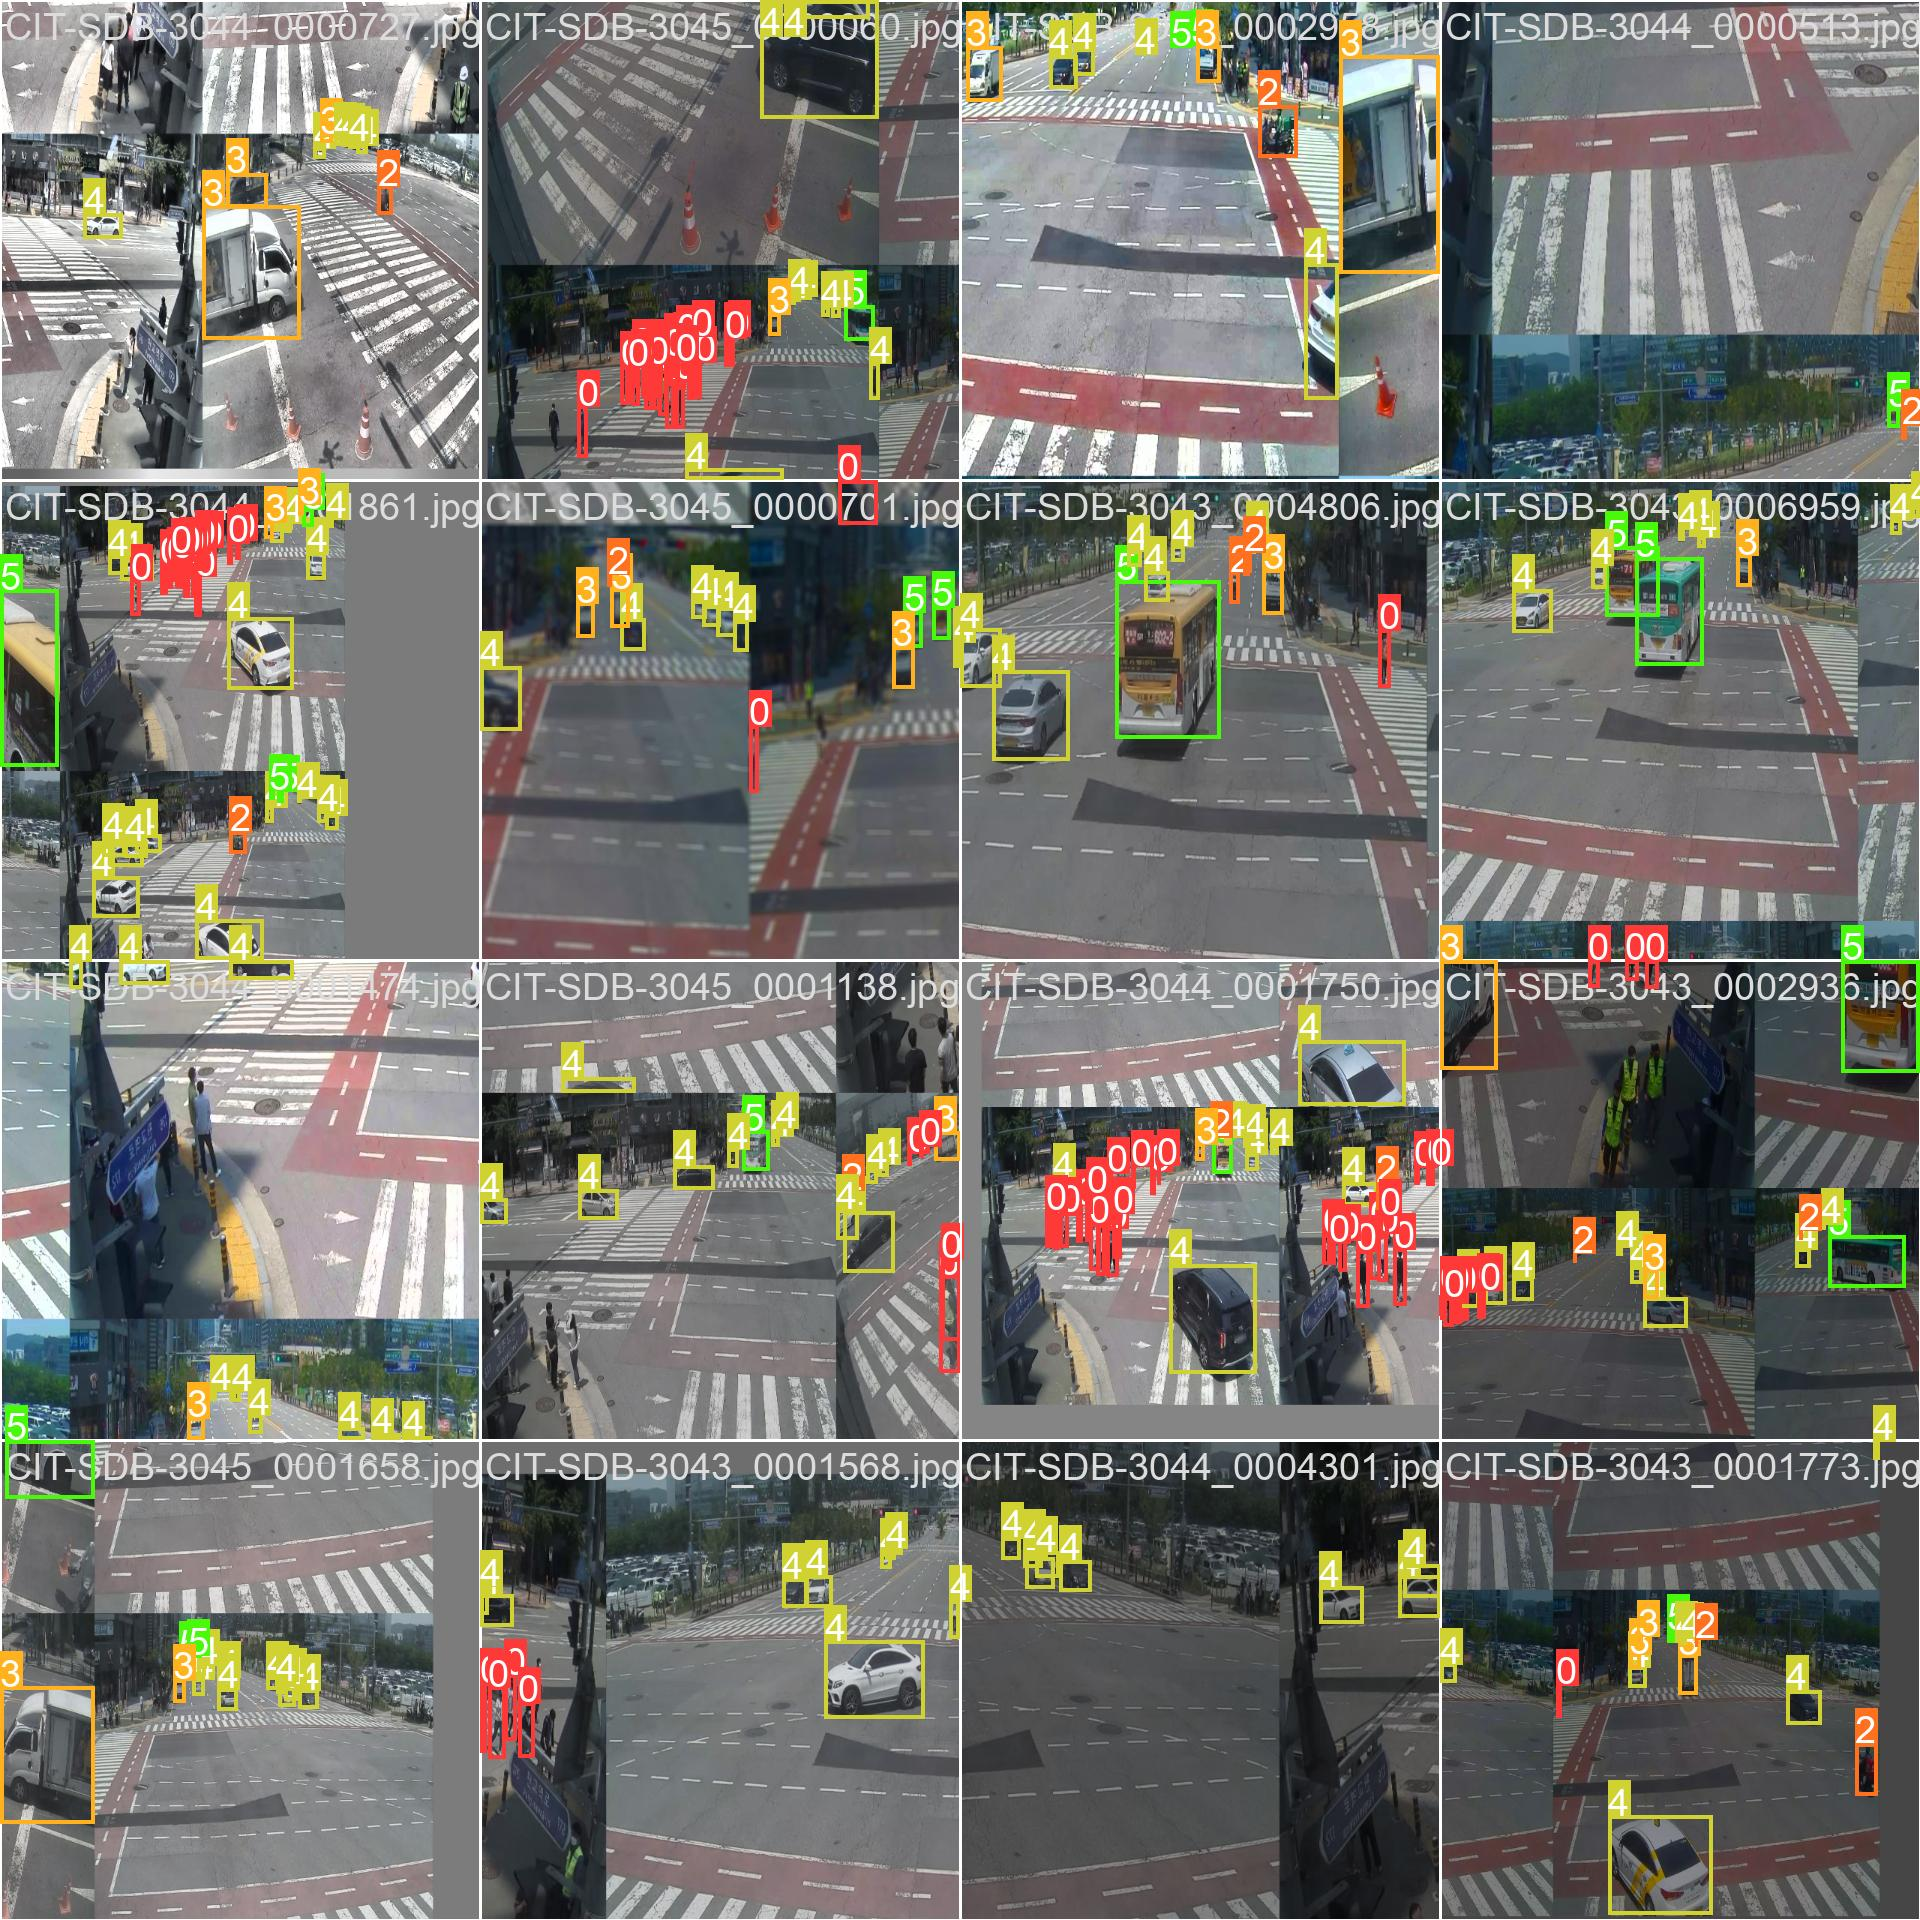

In [ ]:
Image(filename = 'runs/train/ai_results3/train_batch1.jpg', width = 1000 )

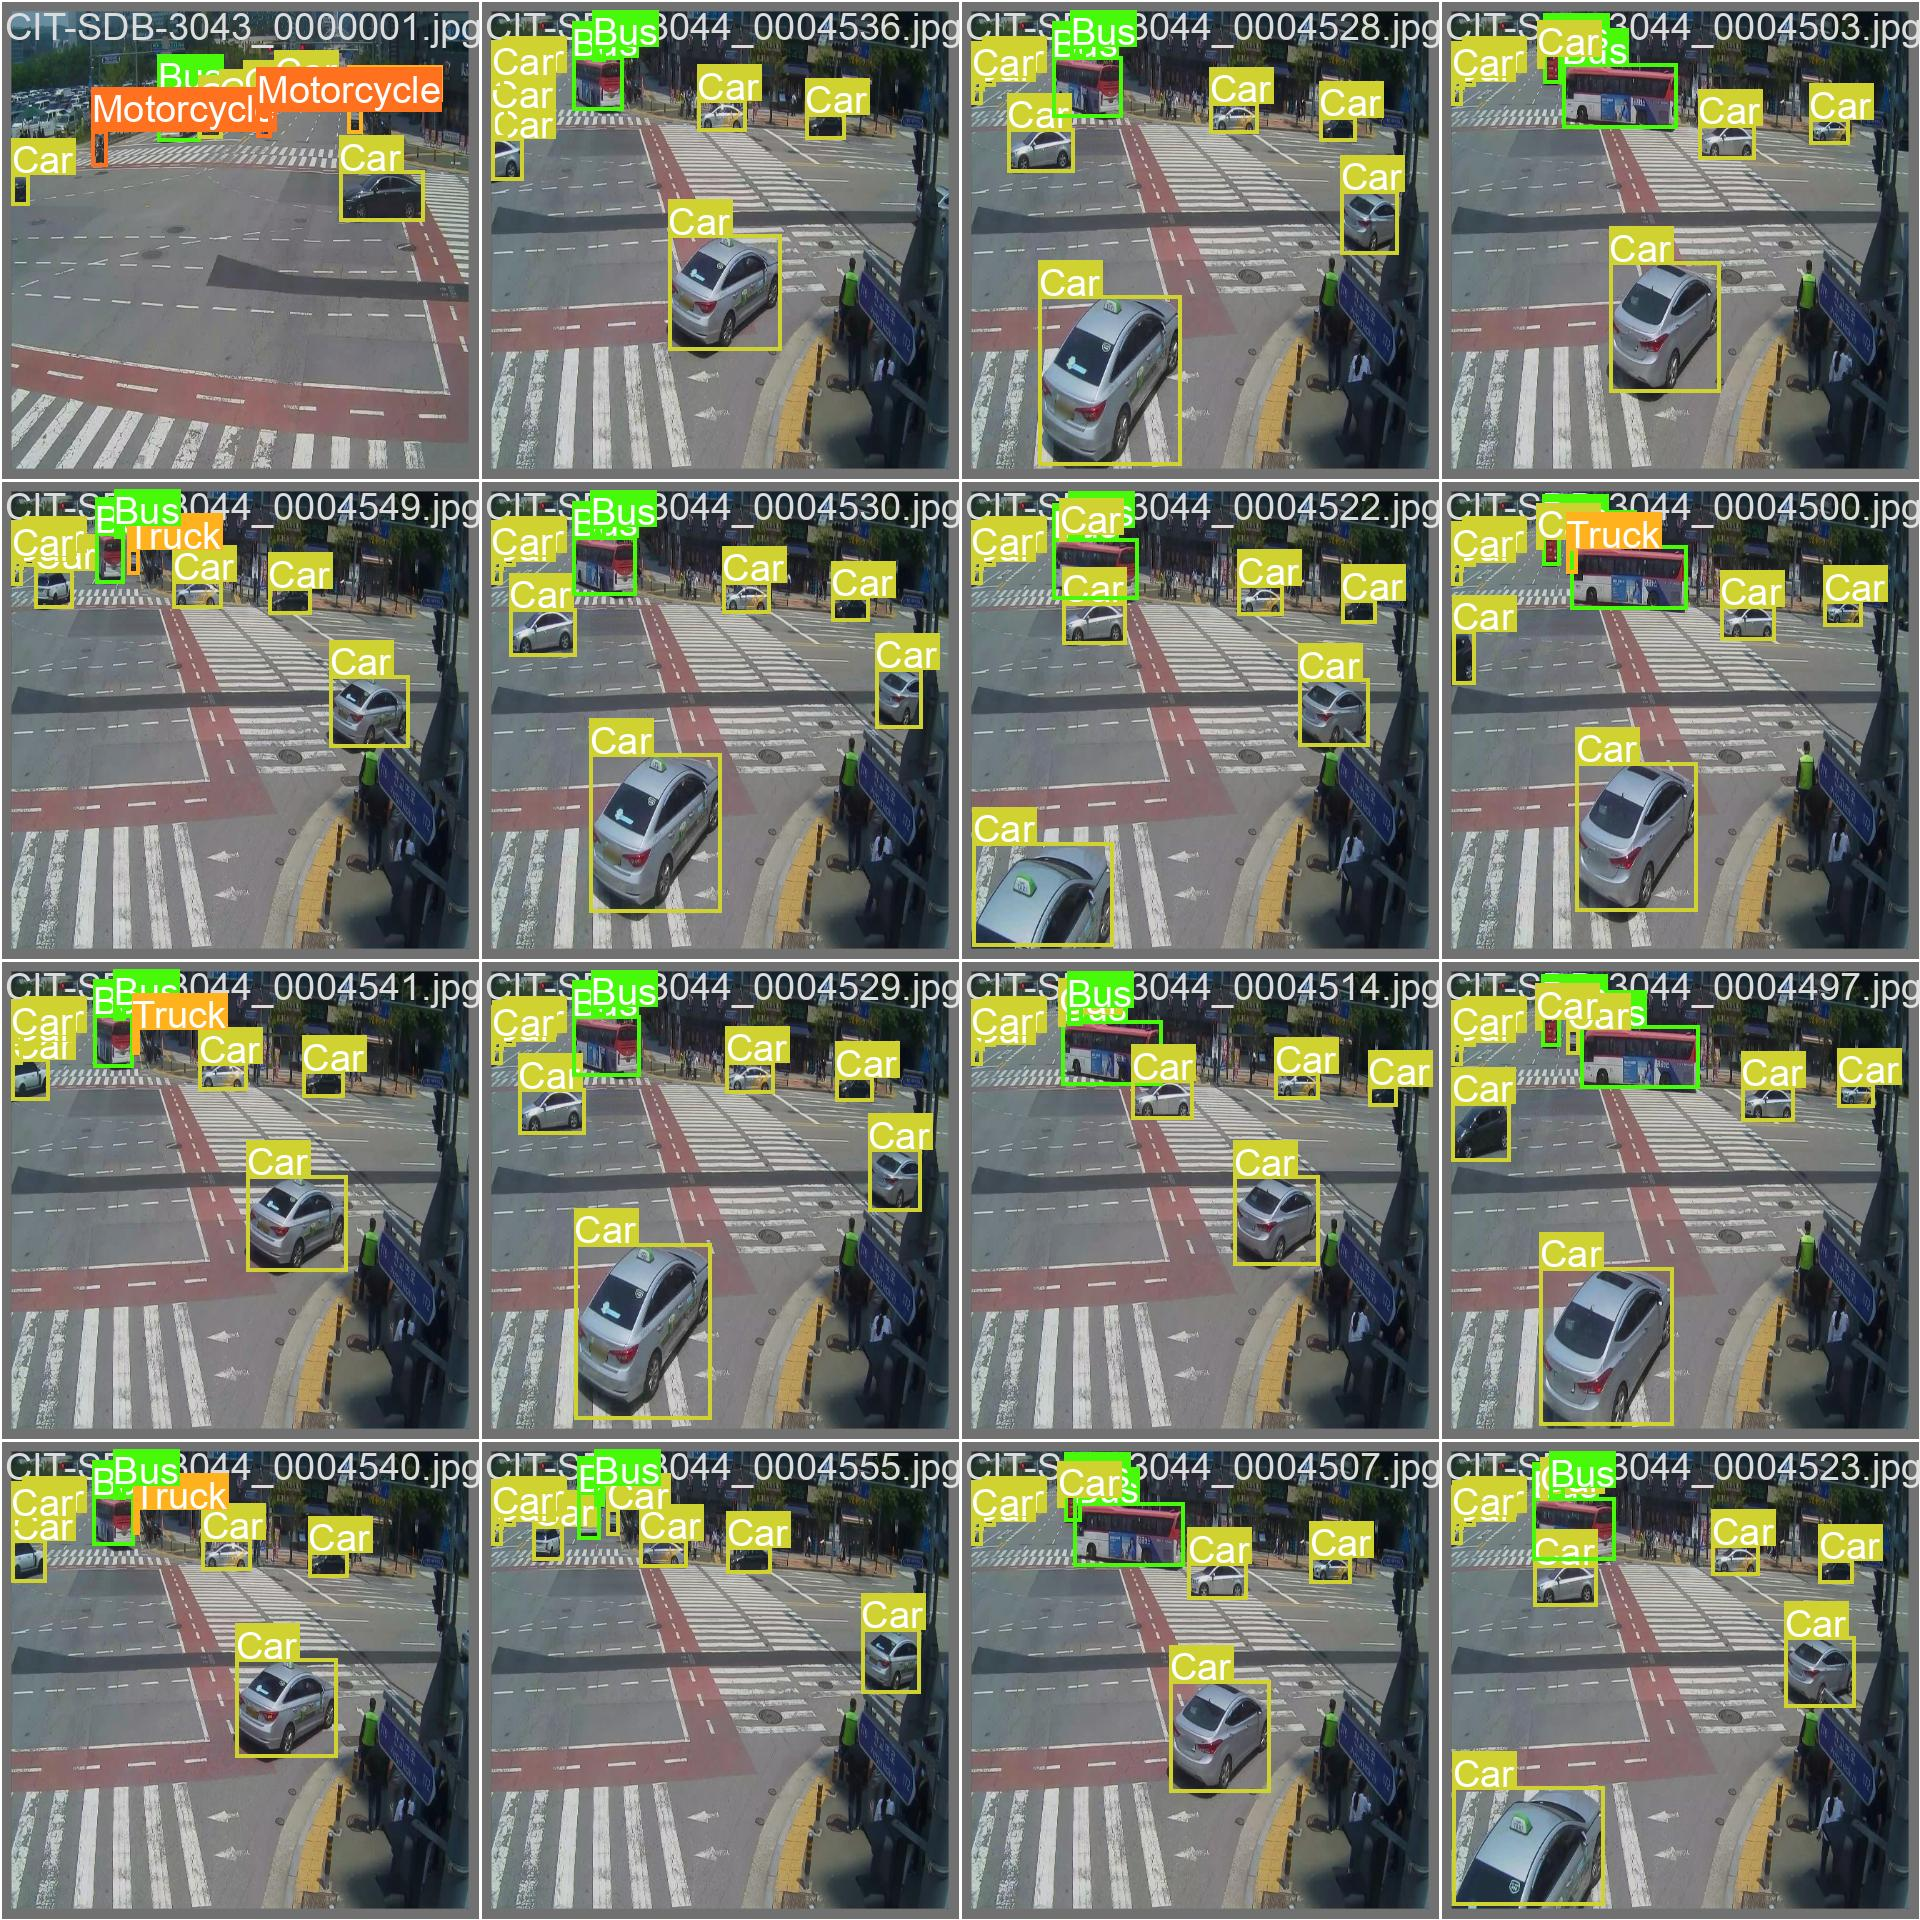

In [ ]:
Image(filename = 'runs/train/ai_results3/val_batch0_labels.jpg', width = 1000 )

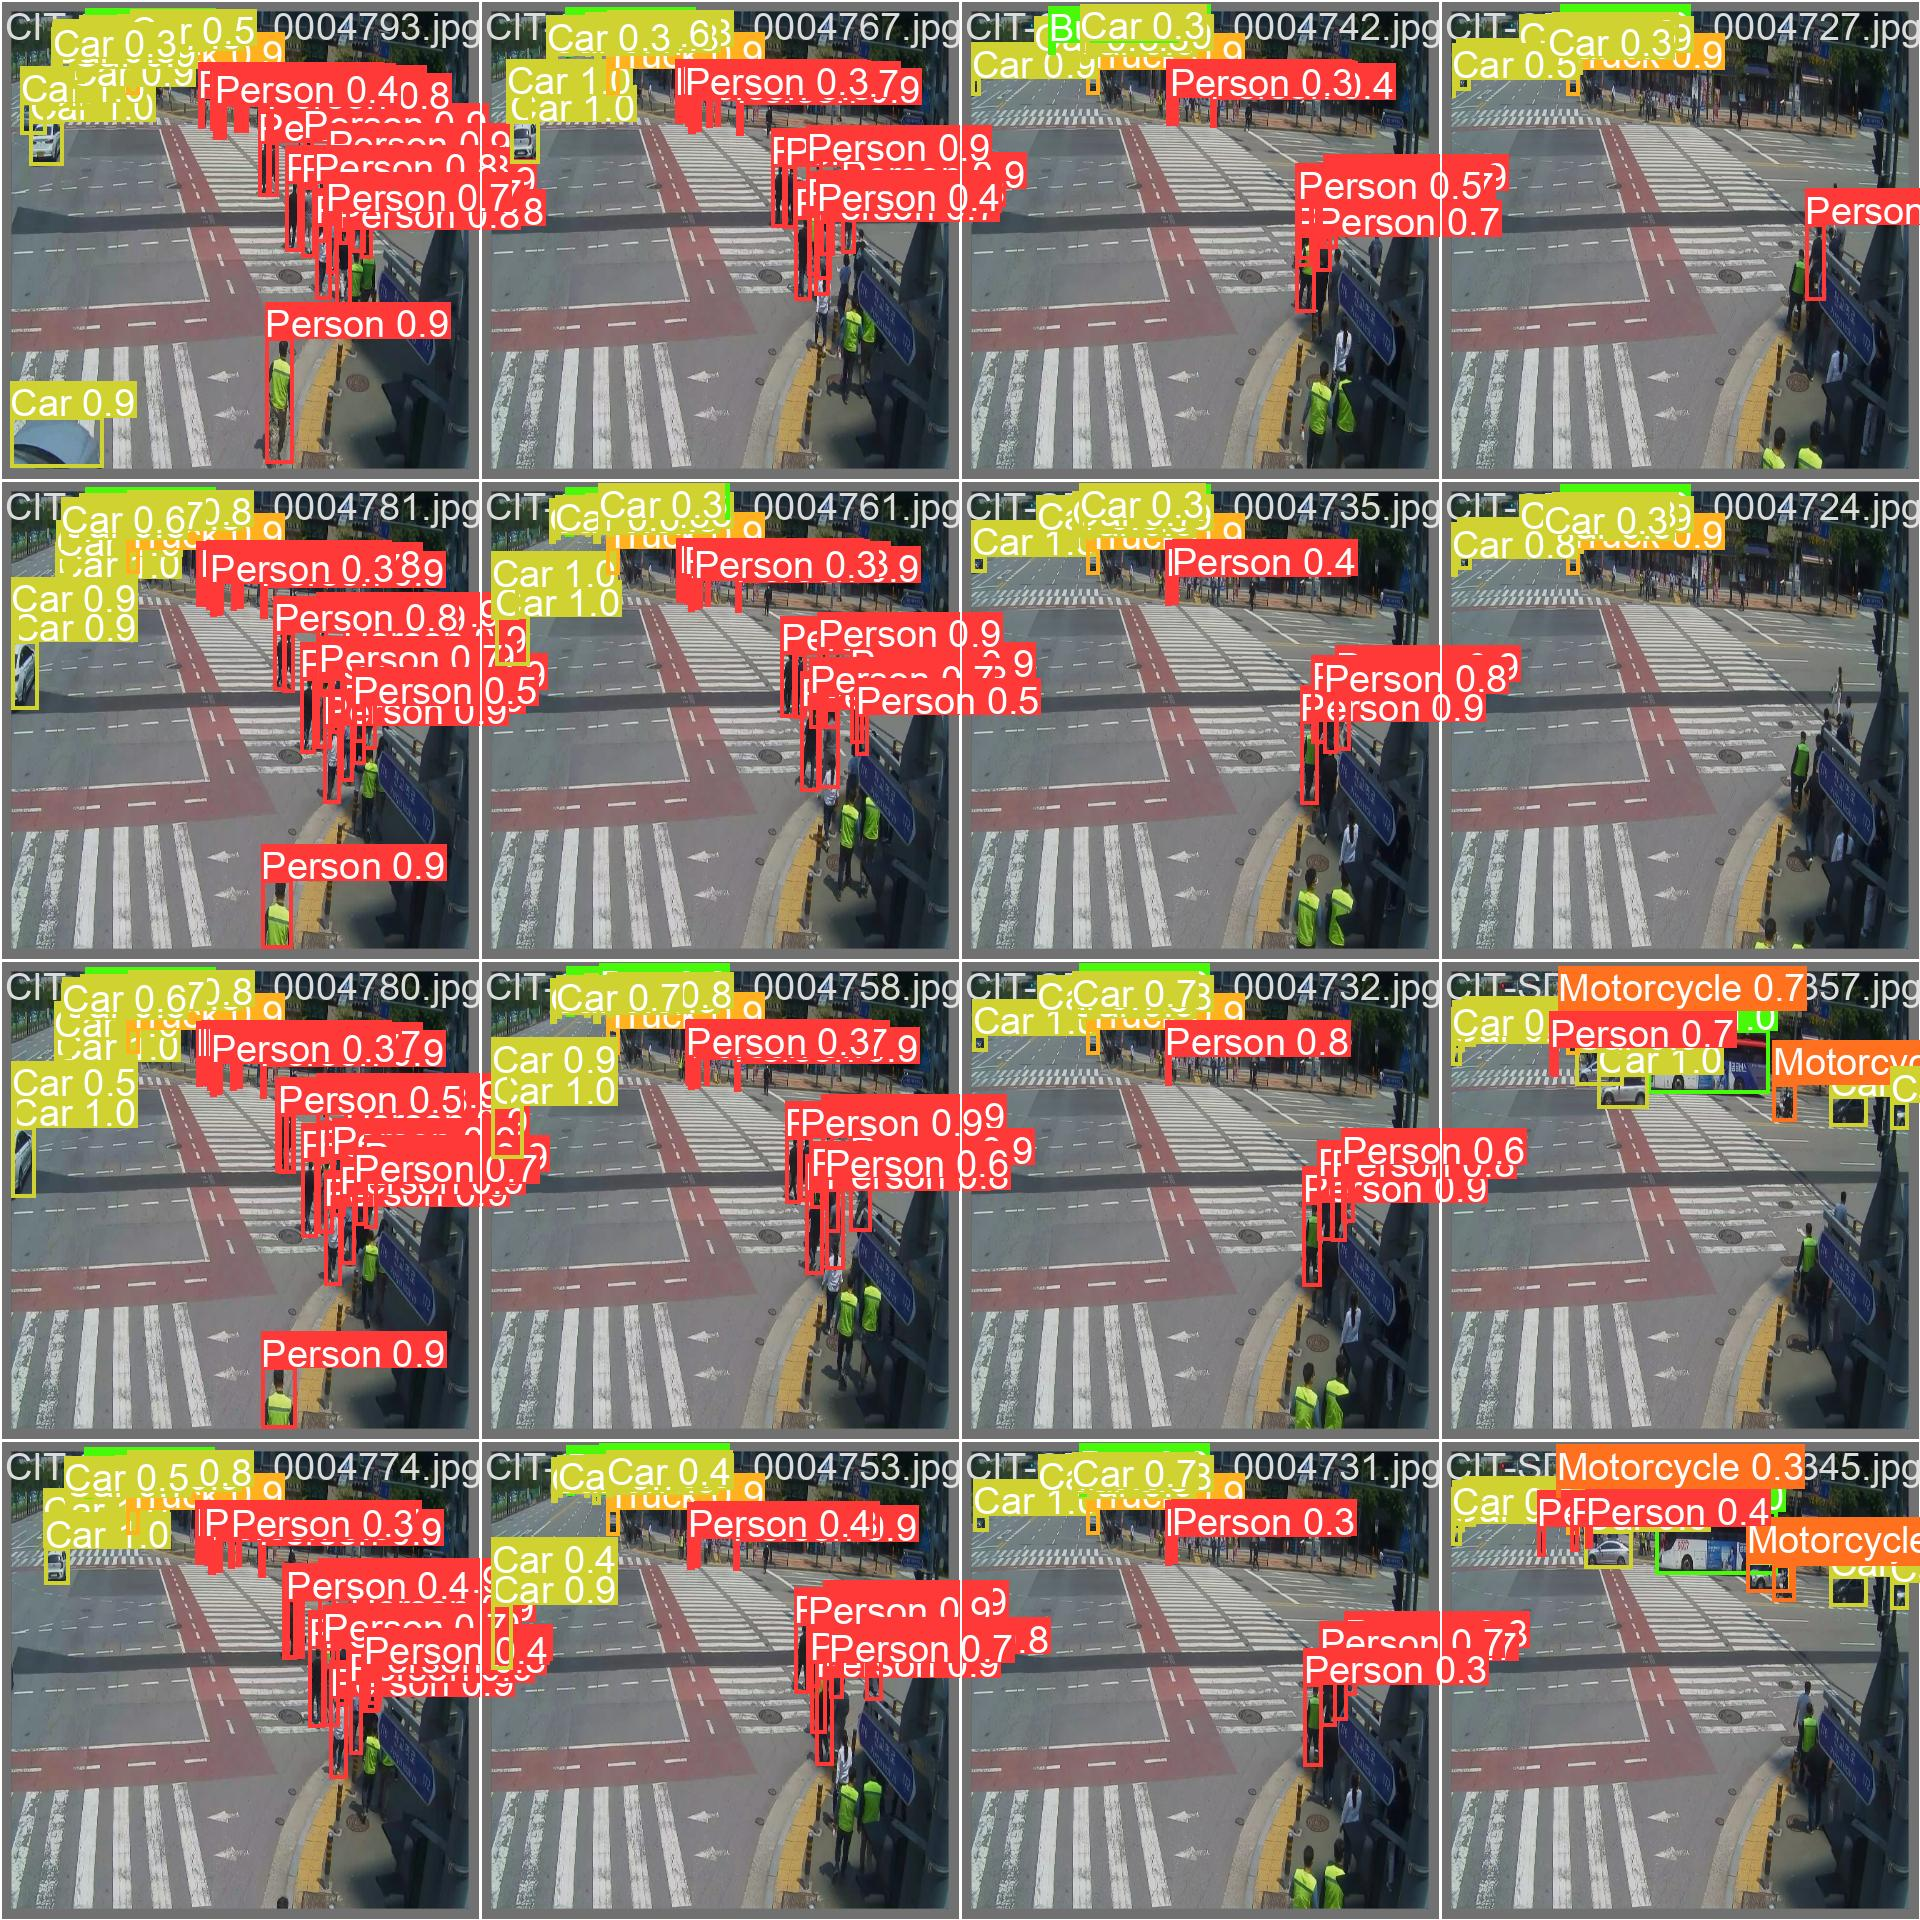

In [ ]:
Image(filename = '/content/yolov5/runs/train/ai_results3/val_batch2_pred.jpg', width = 1000 )

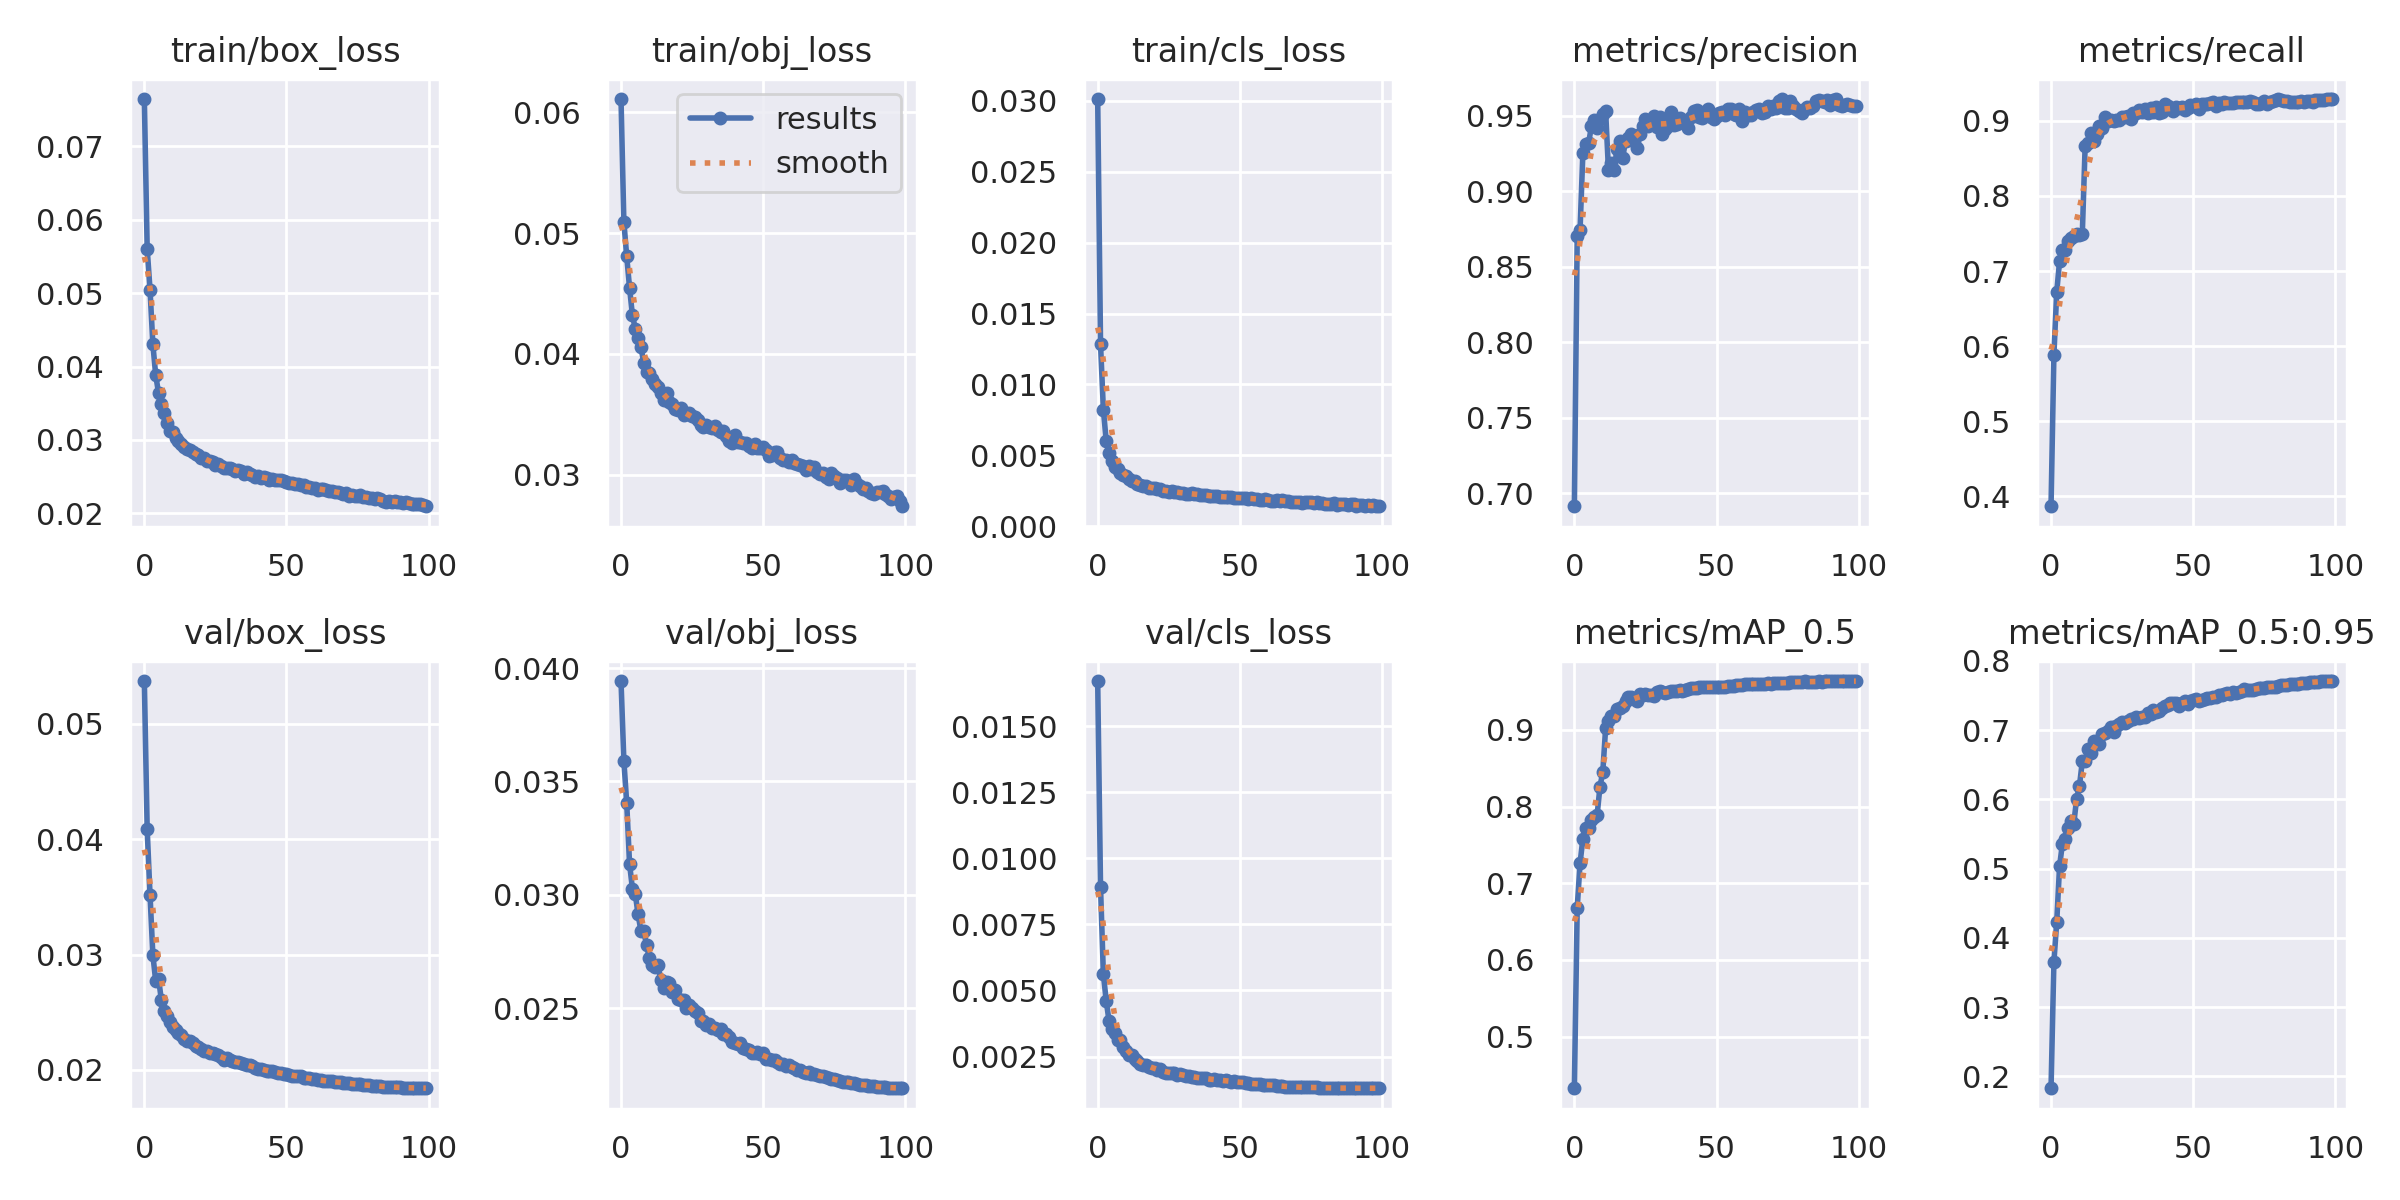

In [ ]:
Image(filename = '/content/yolov5/runs/train/ai_results3/results.png', width = 1000 )

### 검증(Validation)

In [ ]:
!python val.py --weights /content/drive/MyDrive/ai_project/yolomodel/YOLOv5_best.pt --data /content/yolov5/ai_project/data.yaml --img 640 --iou-thres 0.65 --half

## Train 2

In [ ]:
%%writefile /content/yolov5/ai_project/data.yaml

train: /content/yolov5/ai_project/data_fold_1_train.txt
val: /content/yolov5/ai_project/data_fold_1_val.txt


nc: 6
names: ['Person', 'Bicycle', 'Motorcycle', 'Truck', 'Car', 'Bus']


In [ ]:
%cat /content/yolov5/ai_project/data.yaml

In [ ]:
import yaml
# 클래스 수 수정 후 yaml로 저장
with open ("/content/yolov5/ai_project/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [ ]:
%time
%cd /content/yolov5
!python train.py --img 640 --batch 32 --epoch 3 --data ./ai_project/data.yaml --cfg ./models/custom_yolov5s.yaml --weights '/content/drive/MyDrive/ai_project/yolov5s.pt' --name ai_results --cache

### best.pt 출력

In [ ]:
!ls runs/train/ai_results

In [ ]:
%cp  /content/yolov5/runs/train/ai_results/weights/best.pt /content/drive/MyDrive

### 이미지 결과확인

In [ ]:
Image(filename = 'runs/train/ai_results/train_batch1.jpg', width = 1000 )

In [ ]:
Image(filename = '/content/yolov5/runs/train/ai_results/results.png', width = 1000 )

### 검증(Validation)

In [ ]:
!python val.py --weights /content/drive/MyDrive/ai_project/yolomodel/YOLOv5_best.pt --data /content/yolov5/ai_project/data.yaml --img 640 --iou-thres 0.65 --half

## Train 3

In [ ]:
%%writefile /content/yolov5/ai_project/data.yaml

train: /content/yolov5/ai_project/data_fold_2_train.txt
val: /content/yolov5/ai_project/data_fold_2_val.txt


nc: 6
names: ['Person', 'Bicycle', 'Motorcycle', 'Truck', 'Car', 'Bus']


In [ ]:
%cat /content/yolov5/ai_project/data.yaml

In [ ]:
import yaml
# 클래스 수 수정 후 yaml로 저장
with open ("/content/yolov5/ai_project/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [ ]:
%time
%cd /content/yolov5
!python train.py --img 640 --batch 32 --epoch 3 --data ./ai_project/data.yaml --cfg ./models/custom_yolov5s.yaml --weights '/content/drive/MyDrive/ai_project/yolov5s.pt' --name ai_results --cache

### best.pt 출력

In [ ]:
!ls runs/train/ai_results

In [ ]:
%cp  /content/yolov5/runs/train/ai_results/weights/best.pt /content/drive/MyDrive

### 이미지 결과 확인

In [ ]:
Image(filename = 'runs/train/ai_results/train_batch1.jpg', width = 1000 )

In [ ]:
Image(filename = '/content/yolov5/runs/train/ai_results/results.png', width = 1000 )

### 검증(Validation)

In [37]:
!python val.py --weights /content/drive/MyDrive/ai_project/yolomodel/YOLOv5_best.pt --data /content/yolov5/ai_project/data.yaml --img 640 --iou-thres 0.65 --half

val: data=/content/yolov5/ai_project/data.yaml, weights=['/content/drive/MyDrive/ai_project/yolomodel/YOLOv5_best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.65, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
custom_YOLOv5s summary: 157 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/yolov5/ai_project/data_fold_0_val.cache... 4667 images, 0 backgrounds, 0 corrupt: 100% 4667/4667 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/yolov5/ai_project/train/images/CIT-SDB-3043_0005801.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/yolov5/ai_project/train/images/CIT-SDB-3044_0007383.jpg: 4 duplicate labels removed
                 Class     Images  Instances        

# 평균내기

In [39]:
import numpy as np

# Replace these lists with your actual metrics from each fold
precision_list = [0.962, 0.960, 0.965]  # Precision values from each fold
recall_list = [0.938, 0.940, 0.935]     # Recall values from each fold

# Note: F1-Score is not directly provided by val.py, it's calculated as 2*(precision*recall)/(precision+recall)
# Calculating F1 score for each fold
f1_score_list = [2 * (p * r) / (p + r) for p, r in zip(precision_list, recall_list)]

# Function to calculate average and standard deviation
def calculate_average_and_std(metric_list):
    average = np.mean(metric_list)
    std_dev = np.std(metric_list)
    return average, std_dev

# Calculating for each metric
precision_avg, precision_std = calculate_average_and_std(precision_list)
recall_avg, recall_std = calculate_average_and_std(recall_list)
f1_score_avg, f1_score_std = calculate_average_and_std(f1_score_list)

# Print the results
print(f"Precision: Average = {precision_avg:.3f}, Standard Deviation = {precision_std:.3f}")
print(f"Recall: Average = {recall_avg:.3f}, Standard Deviation = {recall_std:.3f}")
print(f"F1 Score: Average = {f1_score_avg:.3f}, Standard Deviation = {f1_score_std:.3f}")

Precision: Average = 0.962, Standard Deviation = 0.002
Recall: Average = 0.938, Standard Deviation = 0.002
F1 Score: Average = 0.950, Standard Deviation = 0.000


In [ ]:
# import torch
# from models.yolo import Model  # Adjust this import based on your YOLOv5 setup

# # Define the number of classes your model is trained on
# num_classes = 6  # Replace with the actual number of classes

# # Initialize the model with the correct architecture
# model = Model(cfg='/content/yolov5/models/custom_yolov5s.yaml', ch=3, nc=num_classes)

# # Load the entire checkpoint
# checkpoint = torch.load('/content/drive/MyDrive/ai_project/yolomodel/YOLOv5_best.pt')

# # Load only the model weights
# model.load_state_dict(checkpoint['model'].state_dict())

# model.eval()


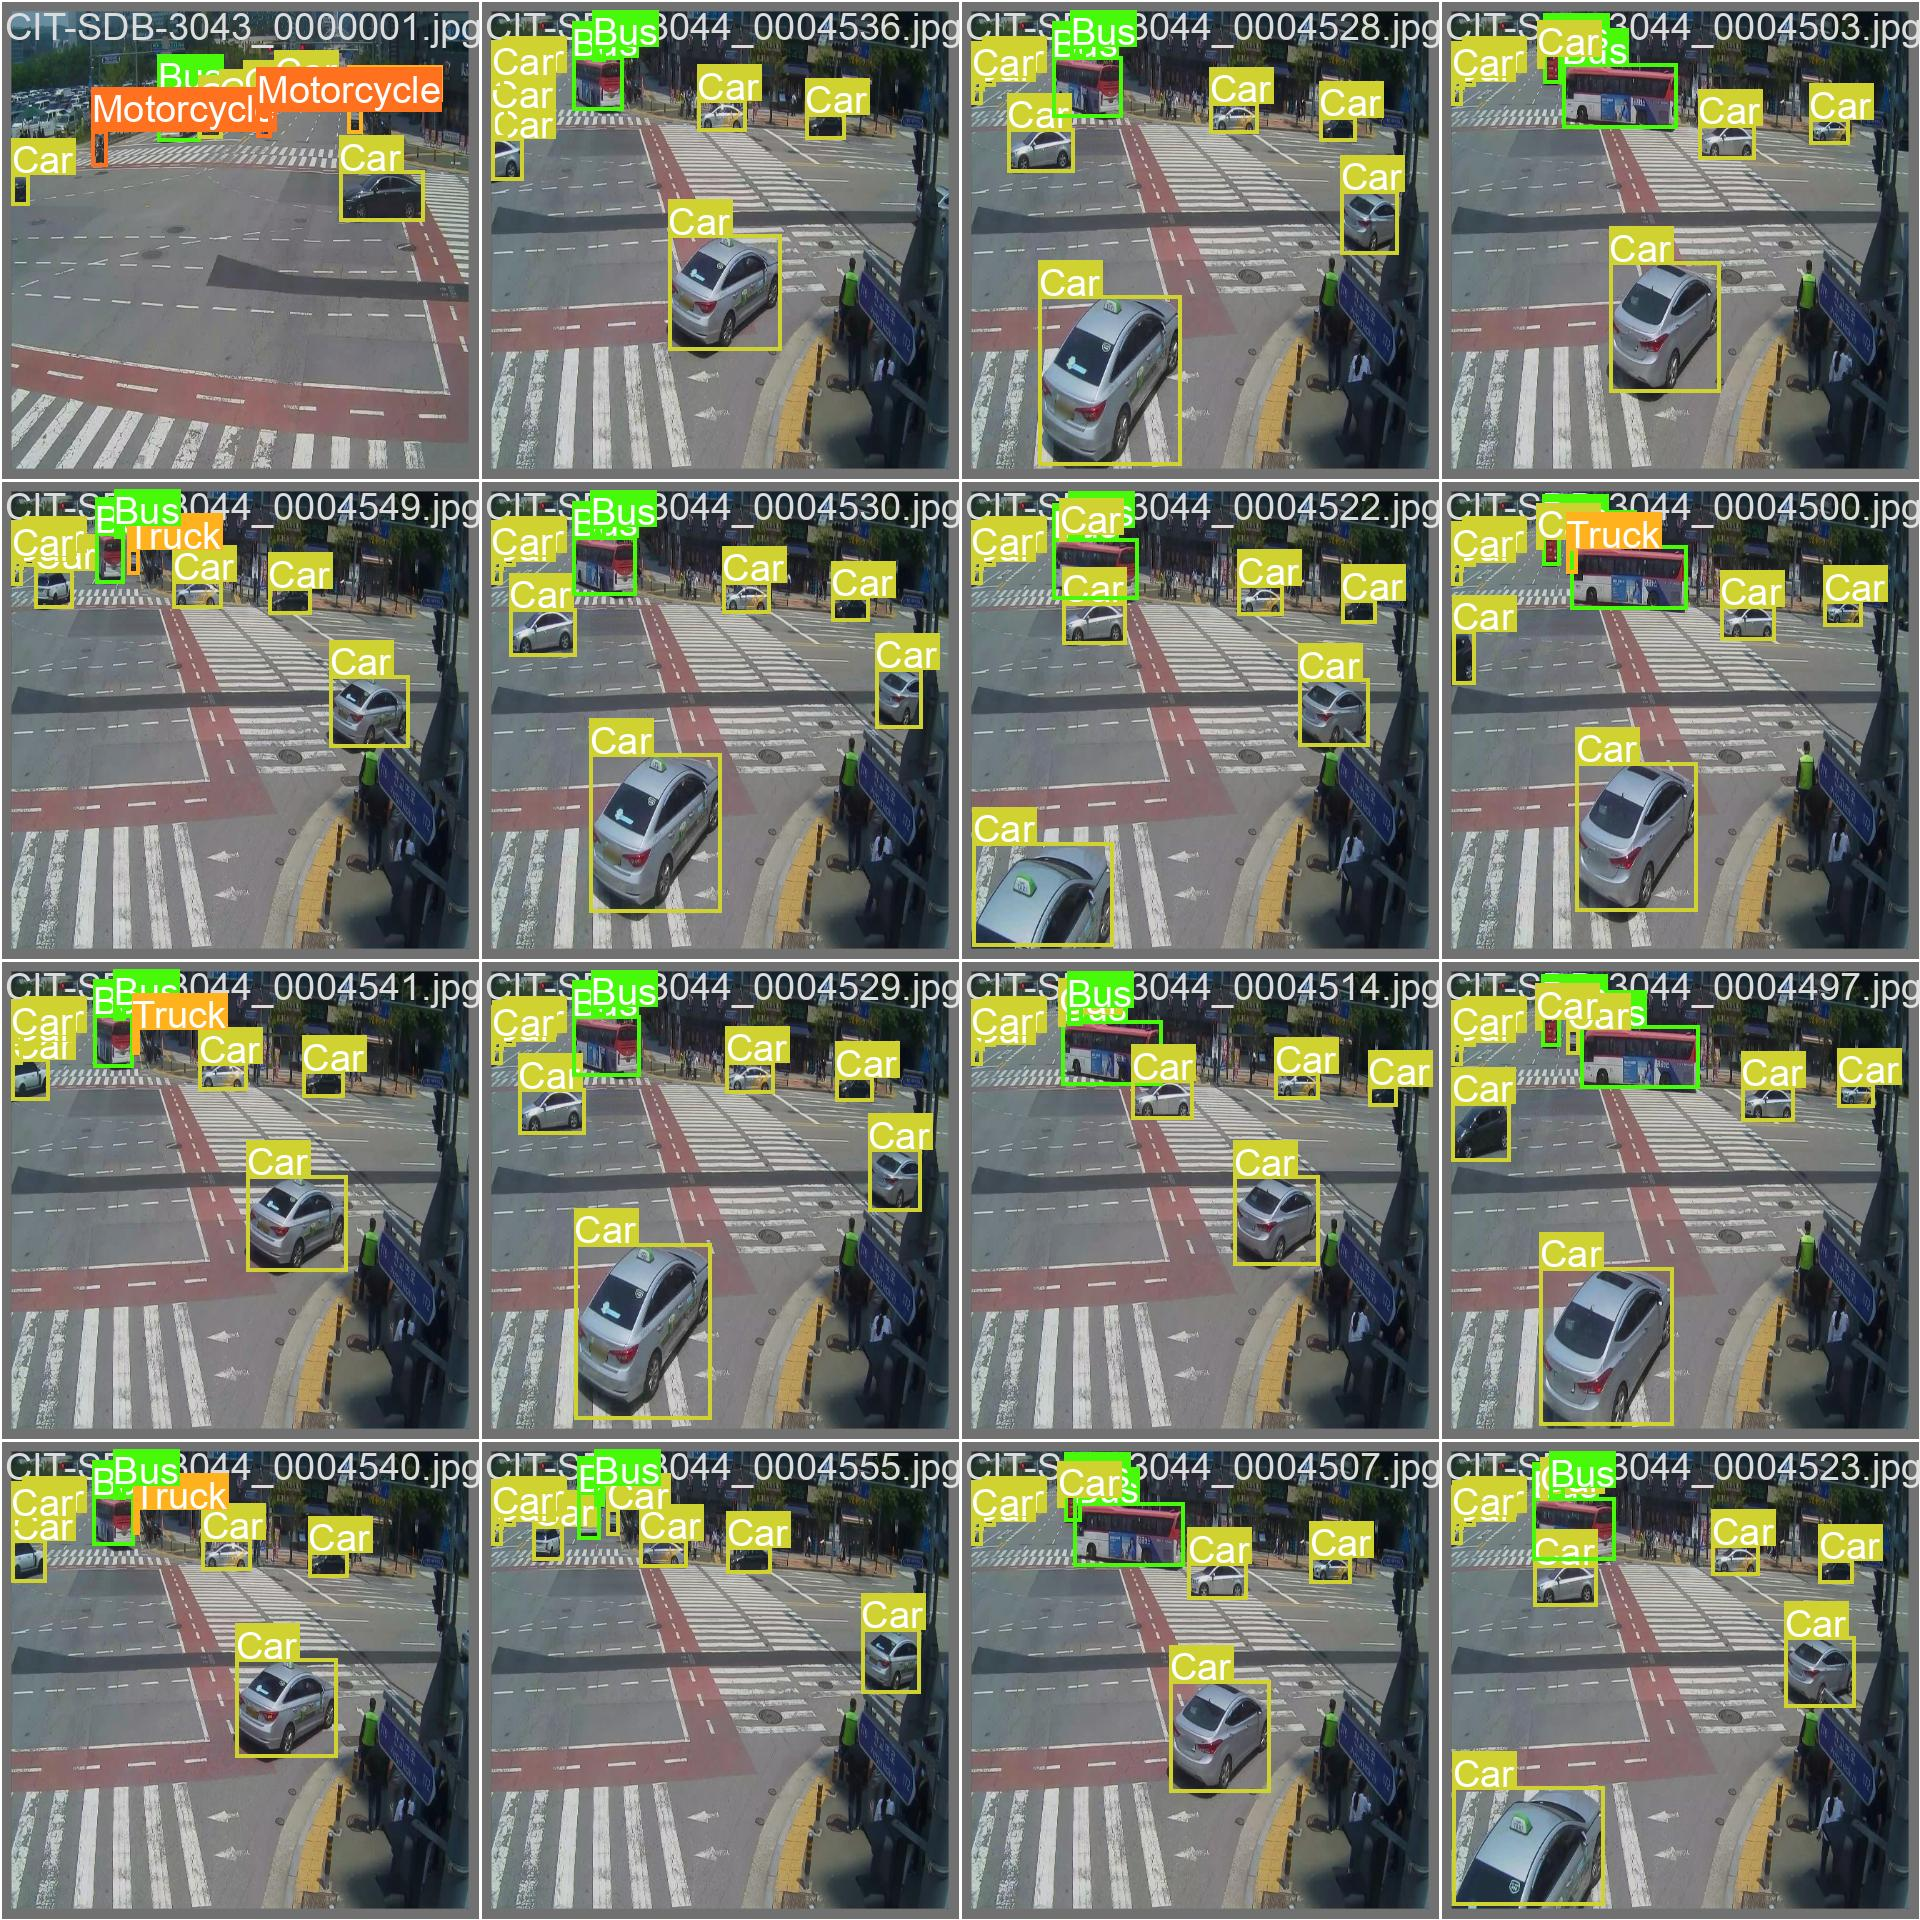

In [ ]:
Image(filename = '/content/yolov5/runs/val/exp3/val_batch0_labels.jpg', width = 1000 )

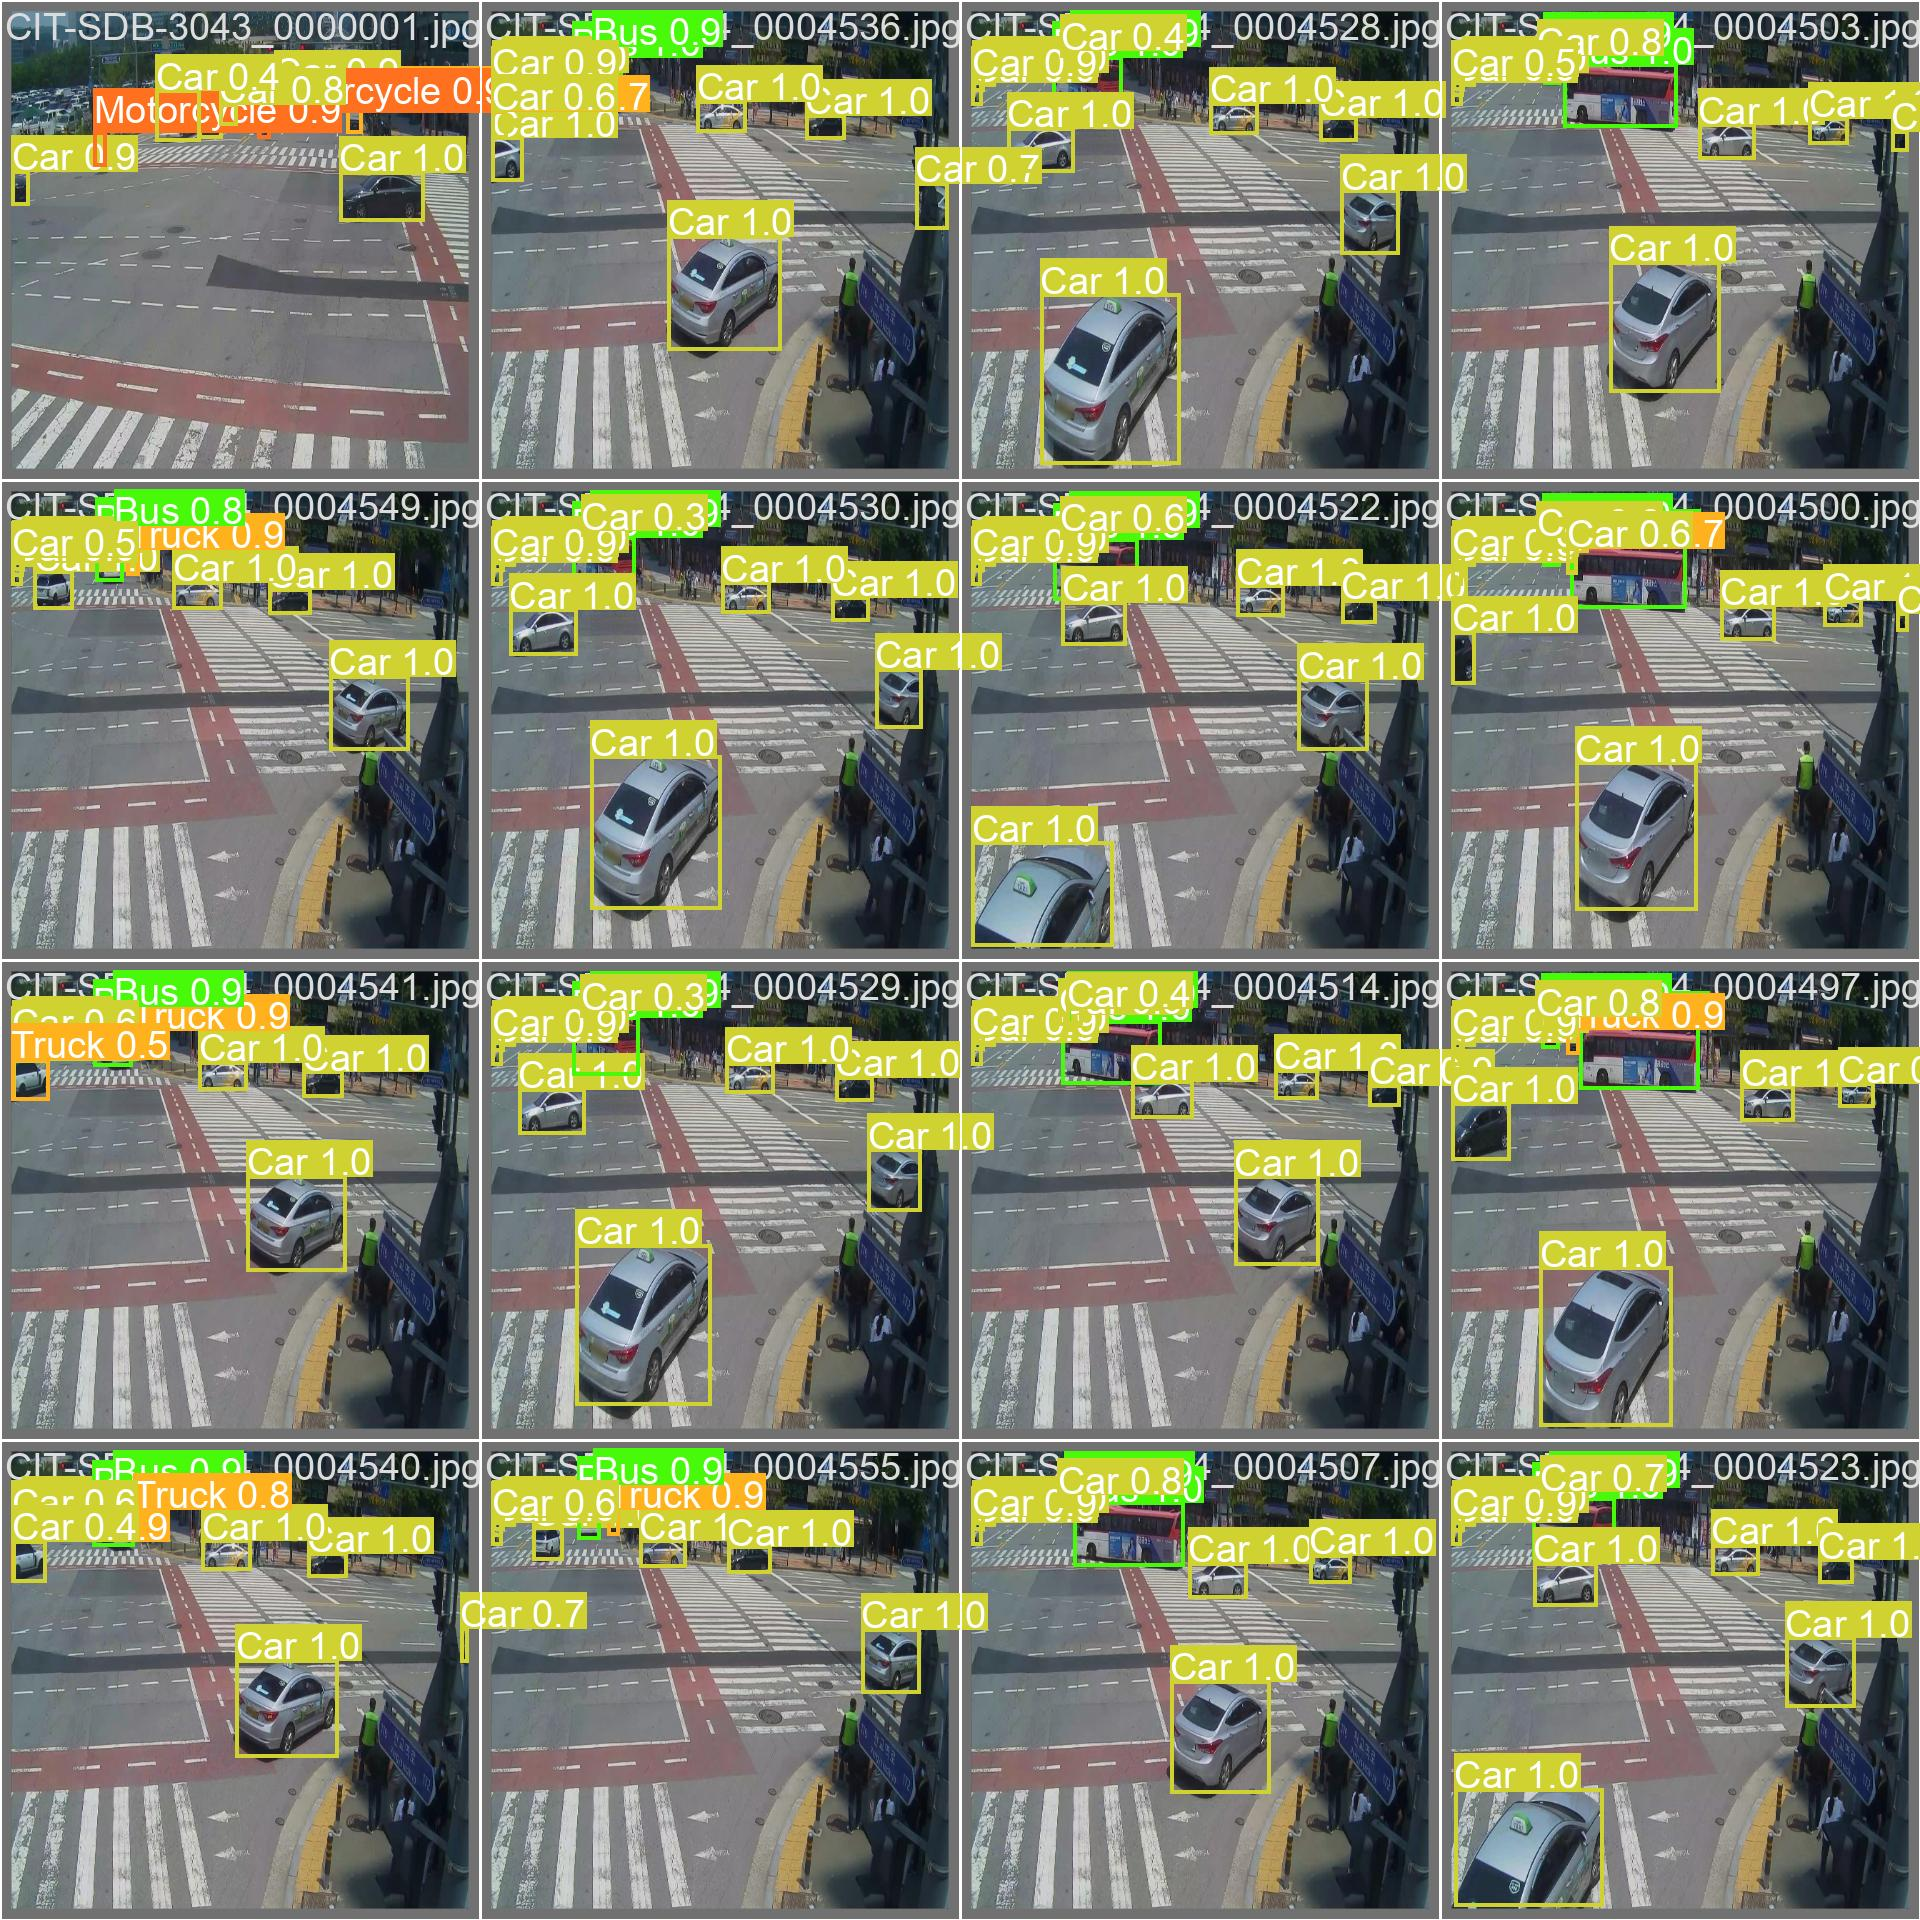

In [ ]:
Image(filename = '/content/yolov5/runs/val/exp3/val_batch0_pred.jpg', width = 1000 )

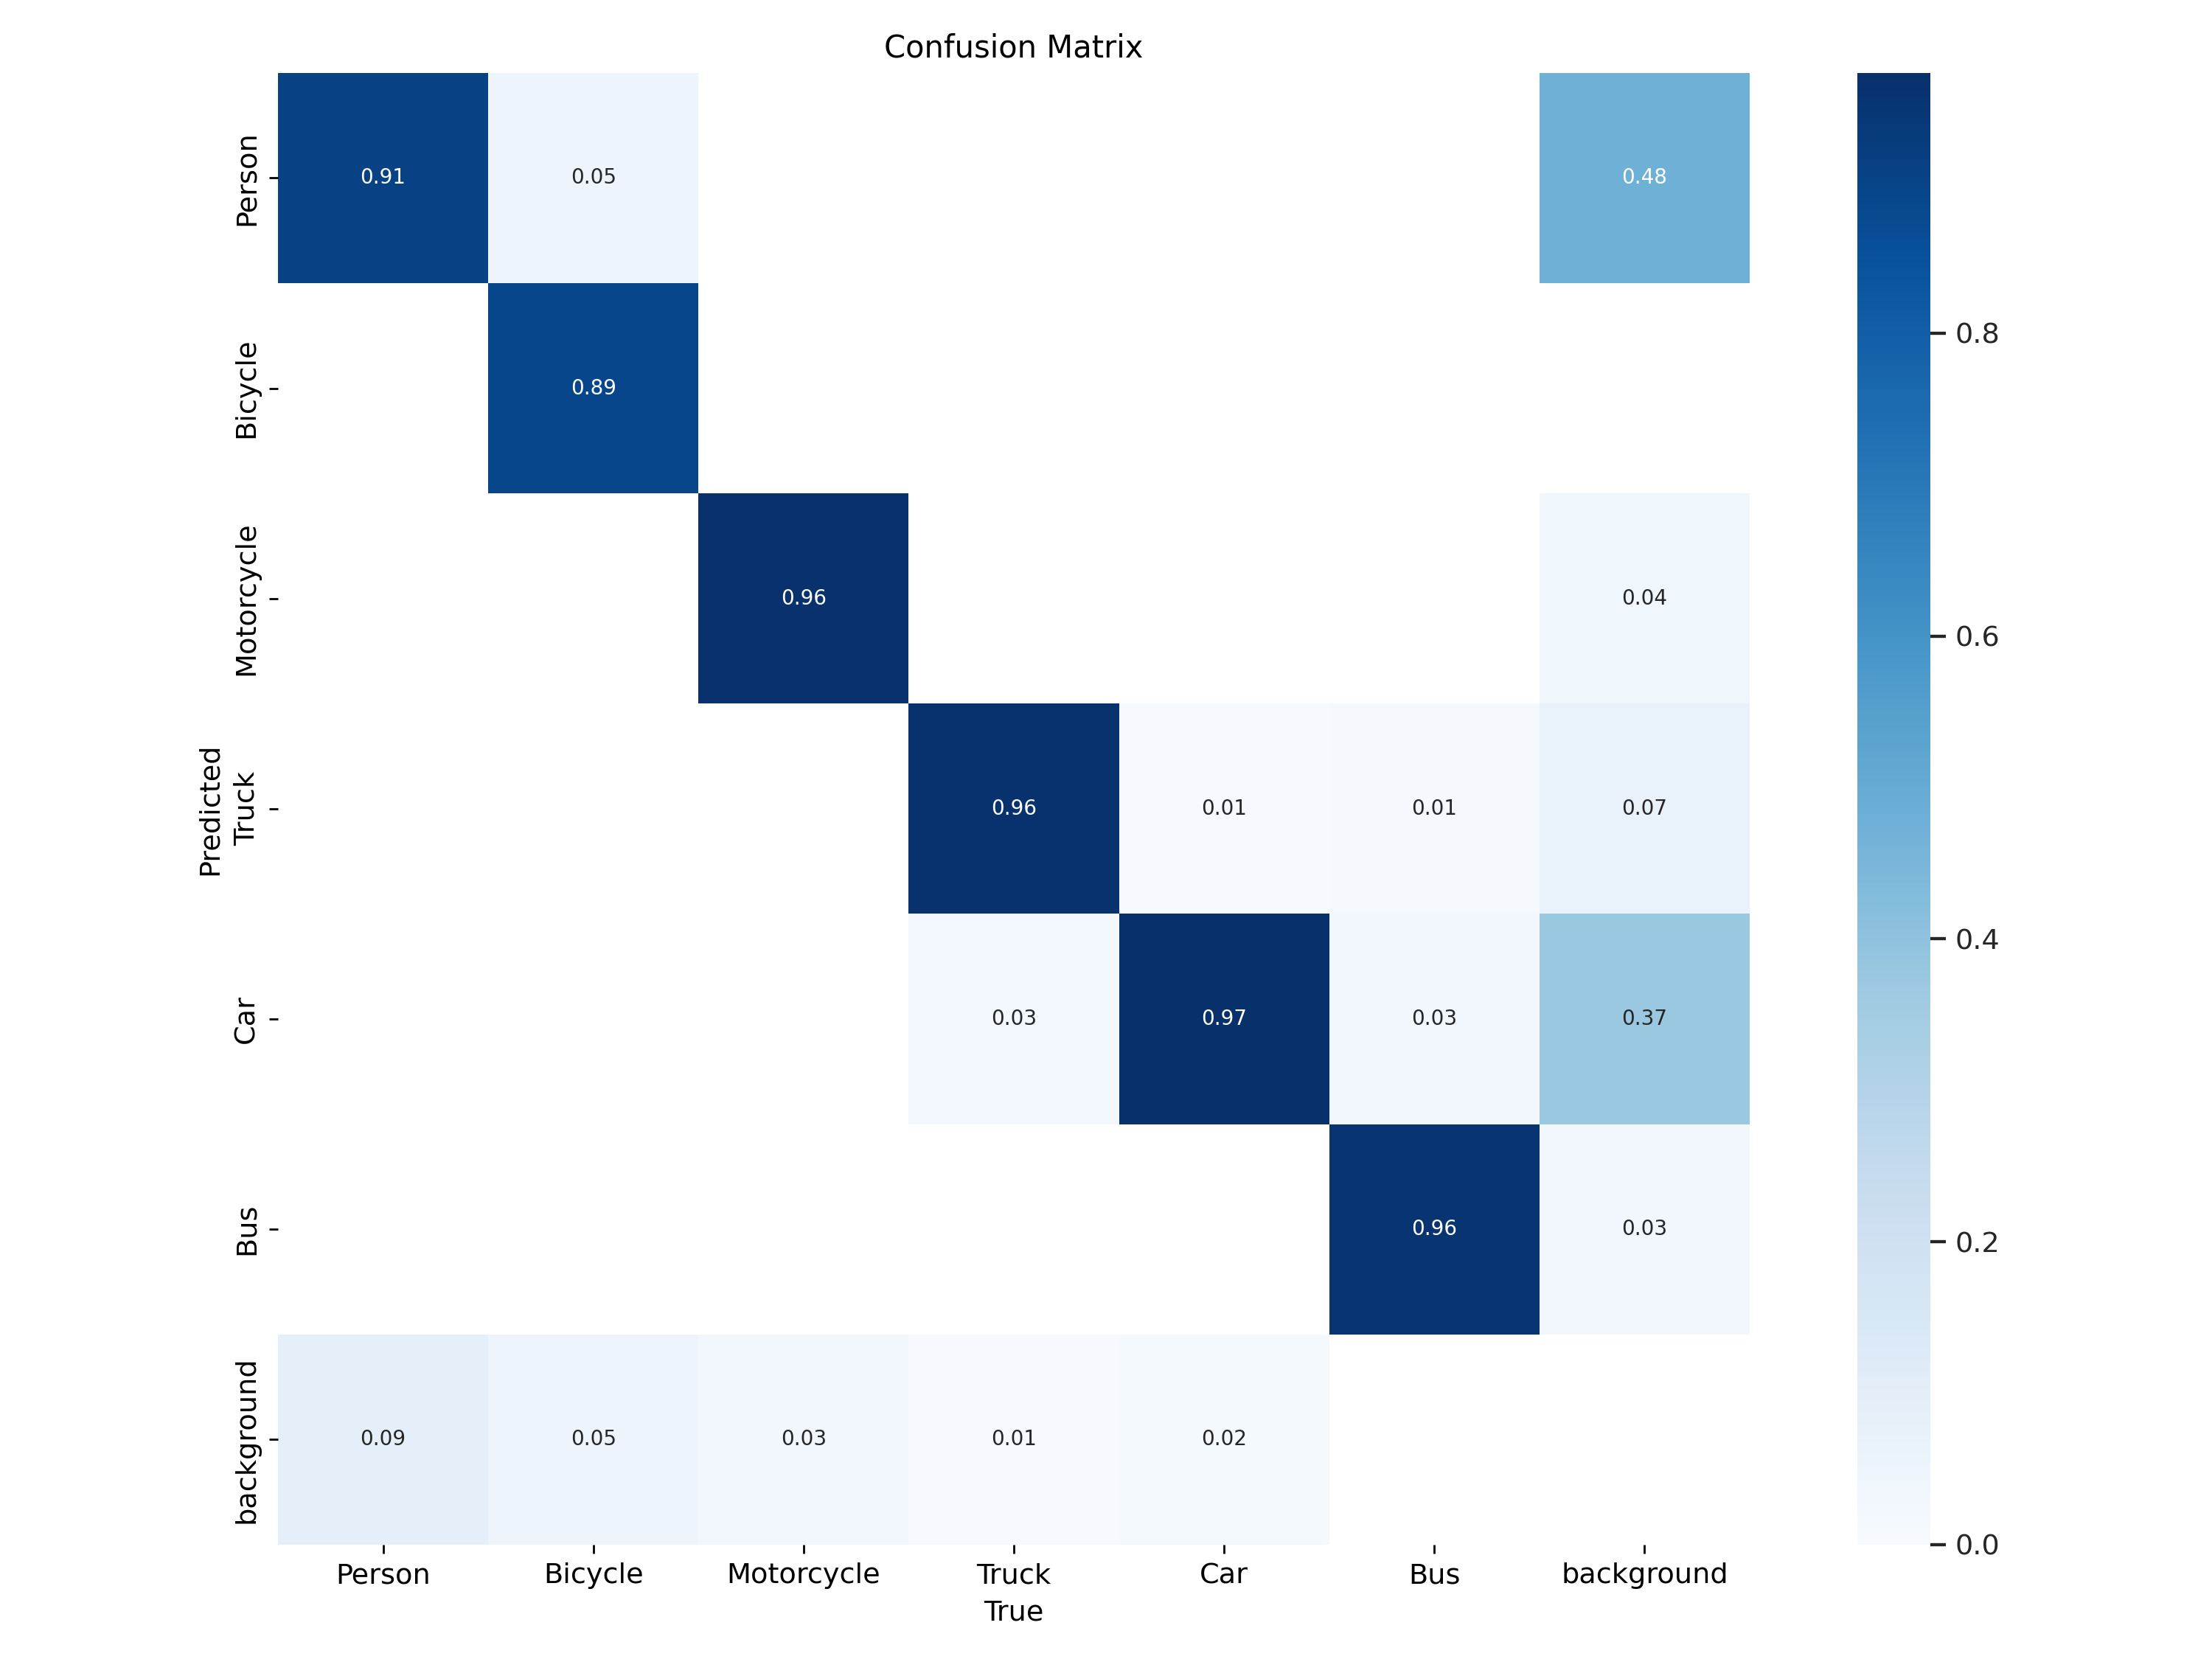

In [ ]:
Image(filename = '/content/yolov5/runs/val/exp3/confusion_matrix.png', width = 1000 )

# 추론(Inference)
- 제일 점수 잘 나온걸로 사용



In [ ]:
%ls /content/yolov5/runs/train/ai_results3/weights

best.pt  last.pt


In [ ]:
!python detect.py --weights /content/yolov5/runs/train/ai_results3/weights/best.pt --img 640 --conf 0.4 --source //content/yolov5/ai_project/test/images

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
image 1003/6000 /content/yolov5/ai_project/test/images/CIT-SDB-3043_0003416.jpg: 384x640 4 Persons, 3 Trucks, 7 Cars, 1 Bus, 7.5ms
image 1004/6000 /content/yolov5/ai_project/test/images/CIT-SDB-3043_0003417.jpg: 384x640 5 Persons, 3 Trucks, 7 Cars, 1 Bus, 7.5ms
image 1005/6000 /content/yolov5/ai_project/test/images/CIT-SDB-3043_0003419.jpg: 384x640 5 Persons, 3 Trucks, 7 Cars, 1 Bus, 7.5ms
image 1006/6000 /content/yolov5/ai_project/test/images/CIT-SDB-3043_0003424.jpg: 384x640 4 Persons, 3 Trucks, 6 Cars, 1 Bus, 7.5ms
image 1007/6000 /content/yolov5/ai_project/test/images/CIT-SDB-3043_0003426.jpg: 384x640 4 Persons, 3 Trucks, 7 Cars, 1 Bus, 7.5ms
image 1008/6000 /content/yolov5/ai_project/test/images/CIT-SDB-3043_0003427.jpg: 384x640 4 Persons, 1 Motorcycle, 3 Trucks, 6 Cars, 1 Bus, 7.5ms
image 1009/6000 /content/yolov5/ai_project/test/images/CIT-SDB-3043_0003441.jpg: 384x640 4 Persons, 1 Motorcycle, 3 Trucks, 6 Cars, 1 Bus, 7.5ms
image 1010/6000 /co

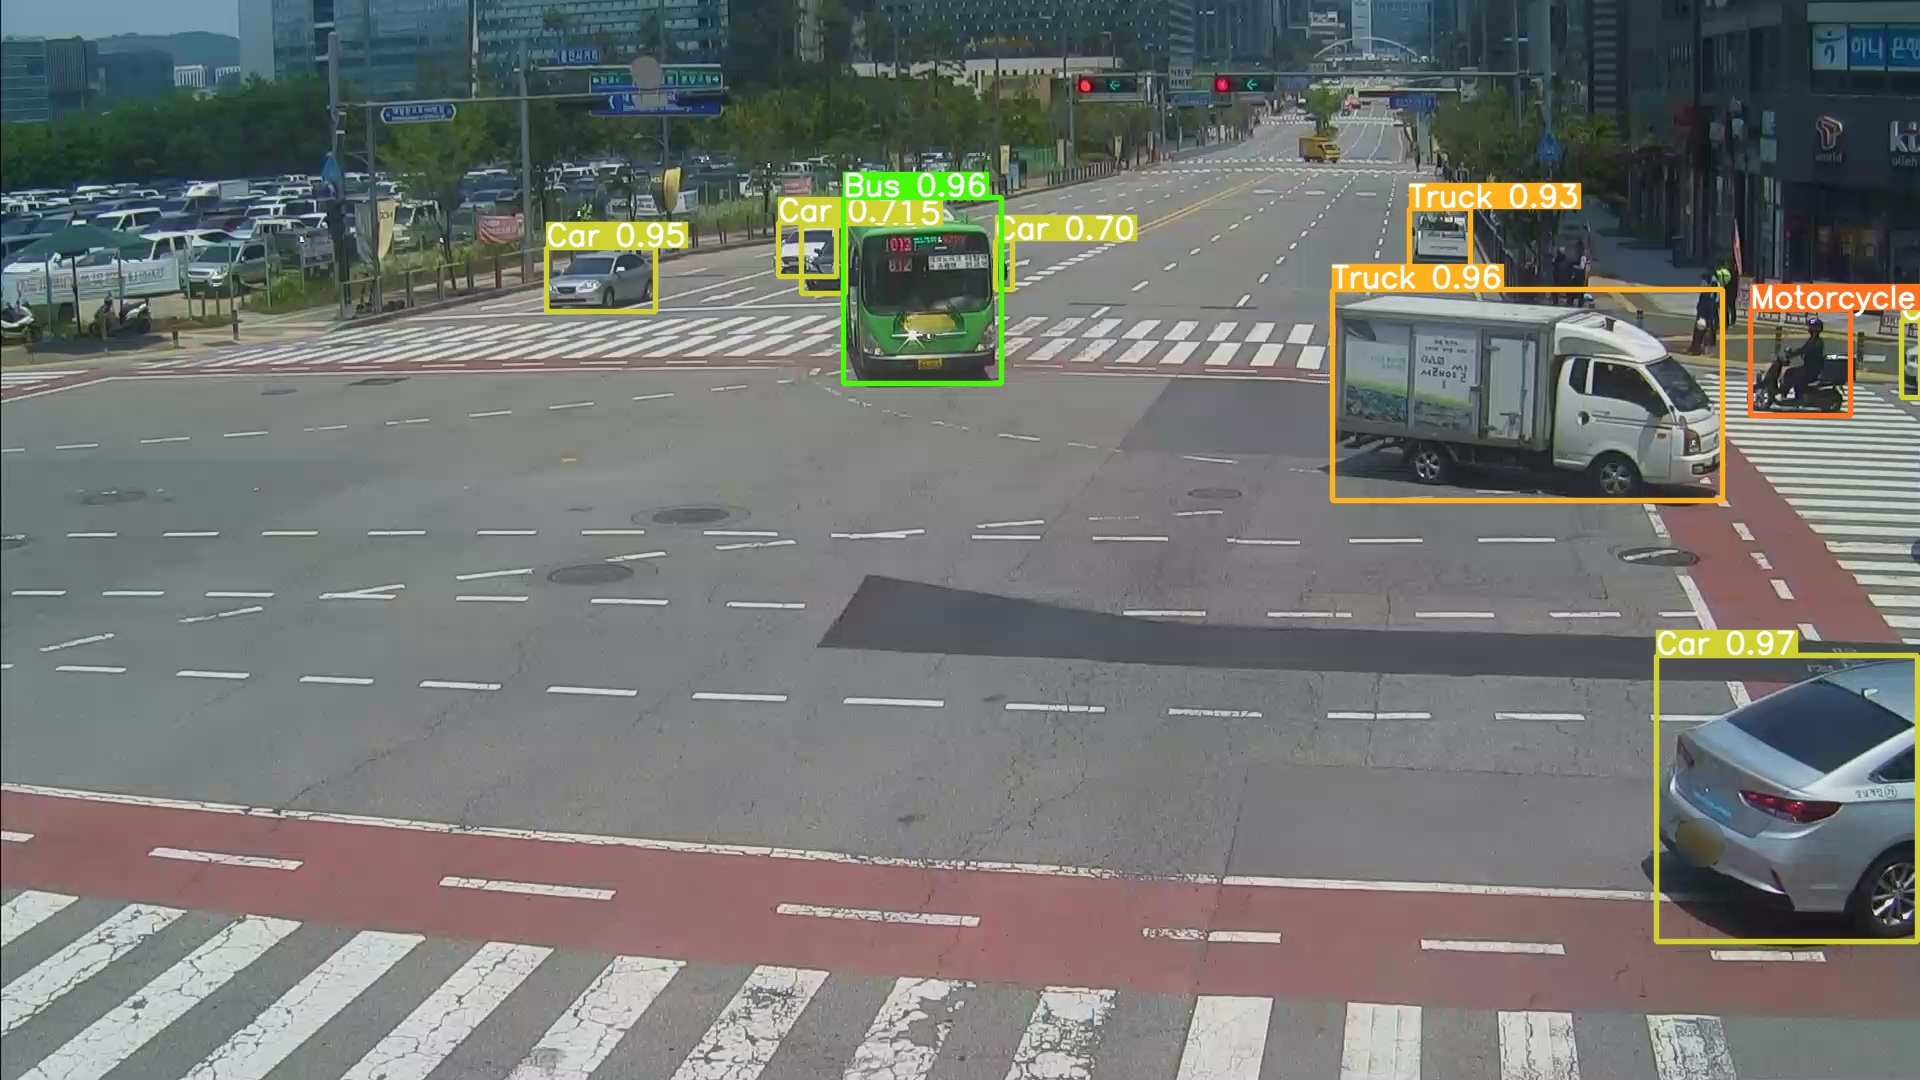

In [ ]:
import glob
import random
from IPython.display import Image,display

image_name = random.choice(glob.glob('/content/yolov5/runs/detect/exp2/*.jpg'))
display (Image(filename = image_name))

In [ ]:
%cp  /content/yolov5/runs/train/ai_results3/weights/best.pt /content/drive/MyDrive/ai_project

In [ ]:
import shutil

def download_drive_folder(drive_folder_path, local_zip_name):
    shutil.make_archive(local_zip_name, 'zip', drive_folder_path)

download_drive_folder('/content/yolov5/runs/train/ai_results3', 'ai_results3')


In [ ]:
from google.colab import files

files.download('ai_results3.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>